In [1]:
#pip install xgboost

In [2]:

#conda install -c anaconda py-xgboost 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
train = pd.read_csv('train_set.csv')


In [4]:
train.isnull().any()

id                       False
week                     False
center_id                False
meal_id                  False
checkout_price           False
base_price               False
emailer_for_promotion    False
homepage_featured        False
num_orders               False
dtype: bool

In [5]:
meal_info = pd.read_csv("meal_detail.csv")
center_info = pd.read_csv("fulfilment_center_info.csv")

In [6]:
trainfinal = pd.merge(train, meal_info, on="meal_id", how="outer")
trainfinal = pd.merge(trainfinal, center_info, on="center_id", how="outer")
trainfinal.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [7]:
trainfinal.apply(lambda x:len(x.unique()))

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
category                     14
cuisine                       4
city_code                    51
region_code                   8
center_type                   3
op_area                      30
dtype: int64

In [8]:
trainfinal.corr()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
id,1.000000,0.002225,0.002641,0.000488,0.001941,0.002909,0.002001,0.003111,0.000702,-0.000387,-0.000648,-0.000090
week,0.002225,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210,0.000405,0.004600,0.001550
center_id,0.002641,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035,0.061078,-0.003426,-0.111869
meal_id,0.000488,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597,-0.003198,-0.001662,-0.001546
checkout_price,0.001941,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108,-0.004805,-0.003648,0.021569
base_price,0.002909,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306,-0.002054,-0.001934,0.018031
emailer_for_promotion,0.002001,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147,-0.005234,-0.007462,-0.019462
homepage_featured,0.003111,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490,0.008640,0.003605,0.041498
num_orders,0.000702,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000,0.041596,0.029744,0.176976
city_code,-0.000387,0.000405,0.061078,-0.003198,-0.004805,-0.002054,-0.005234,0.008640,0.041596,1.000000,0.042686,0.131476


In [9]:
from sklearn.preprocessing import LabelEncoder
lb1 = LabelEncoder()
trainfinal['center_type'] = lb1.fit_transform(trainfinal['center_type'])

lb2 = LabelEncoder()
trainfinal['category'] = lb1.fit_transform(trainfinal['category'])
trainfinal['cuisine'] = lb1.fit_transform(trainfinal['cuisine'])

In [10]:
trainfinal.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,0,3,647,56,2,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,0,3,647,56,2,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,0,3,647,56,2,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,0,3,647,56,2,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,0,3,647,56,2,2.0


In [11]:
trainfinal.corr()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
id,1.000000,0.002225,0.002641,0.000488,0.001941,0.002909,0.002001,0.003111,0.000702,-0.000516,-0.002583,-0.000387,-0.000648,0.000473,-0.000090
week,0.002225,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210,0.003802,-0.018096,0.000405,0.004600,0.000049,0.001550
center_id,0.002641,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035,-0.008446,-0.020980,0.061078,-0.003426,-0.107398,-0.111869
meal_id,0.000488,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597,0.249541,0.165249,-0.003198,-0.001662,-0.006158,-0.001546
checkout_price,0.001941,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108,0.277529,-0.686125,-0.004805,-0.003648,-0.015923,0.021569
base_price,0.002909,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306,0.282205,-0.720500,-0.002054,-0.001934,-0.013596,0.018031
emailer_for_promotion,0.002001,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147,0.095683,-0.151910,-0.005234,-0.007462,0.006194,-0.019462
homepage_featured,0.003111,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490,0.000885,-0.014629,0.008640,0.003605,-0.030041,0.041498
num_orders,0.000702,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000,0.026520,0.127653,0.041596,0.029744,-0.038199,0.176976
category,-0.000516,0.003802,-0.008446,0.249541,0.277529,0.282205,0.095683,0.000885,0.026520,1.000000,0.132044,0.007676,0.005776,-0.007919,0.014487


In [12]:
outlier_index = trainfinal[(trainfinal['num_orders']>10000)].index

In [13]:
trainfinal.drop(outlier_index,inplace = True)

In [14]:
trainfinal.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,0,3,647,56,2,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,0,3,647,56,2,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,0,3,647,56,2,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,0,3,647,56,2,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,0,3,647,56,2,2.0


In [23]:
X=trainfinal[["homepage_featured","meal_id","emailer_for_promotion","op_area","cuisine","category","region_code","city_code"]].values
Y=trainfinal['num_orders'].values

In [24]:
X

array([[   0., 1885.,    0., ...,    0.,   56.,  647.],
       [   0., 1885.,    0., ...,    0.,   56.,  647.],
       [   0., 1885.,    0., ...,    0.,   56.,  647.],
       ...,
       [   0., 2104.,    0., ...,    4.,   77.,  473.],
       [   0., 2104.,    0., ...,    4.,   77.,  473.],
       [   0., 2104.,    0., ...,    4.,   77.,  473.]])

In [25]:
print(X.shape)
print(Y.shape)

(456526, 8)
(456526,)


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [27]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor1.fit(X_train, y_train)
y_pred1 = regressor1.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[239.83 231.  ]
 [254.16 216.  ]
 [292.6  553.  ]
 ...
 [147.68 107.  ]
 [259.08 176.  ]
 [291.08 203.  ]]


In [21]:
import pickle
pickle.dump(regressor1,open('decision.pkl','wb'))

In [39]:
from sklearn.tree import DecisionTreeRegressor
regressor2 = DecisionTreeRegressor(random_state = 2)
regressor2.fit(X_train, y_train)
y_pred2 = regressor2.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

[[242.21 231.  ]
 [254.91 216.  ]
 [292.74 553.  ]
 ...
 [147.67 107.  ]
 [258.73 176.  ]
 [291.44 203.  ]]


In [28]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred1)

0.7409918322047367

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred2)

0.7309060485749859

In [25]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator =regressor1 , X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 66.43 %
Standard Deviation: 0.91 %


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator =regressor2 , X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

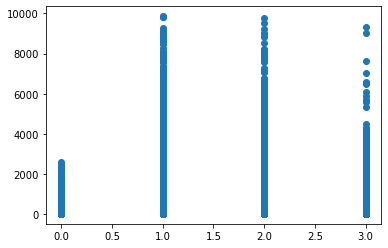

In [41]:
plt.scatter(trainfinal["cuisine"],trainfinal['num_orders'])

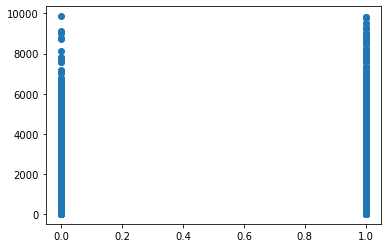

In [42]:
plt.scatter(trainfinal["homepage_featured"],trainfinal['num_orders'])

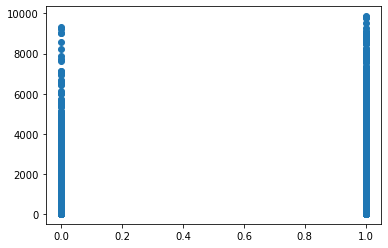

In [43]:
plt.scatter(trainfinal["emailer_for_promotion"],trainfinal['num_orders'])

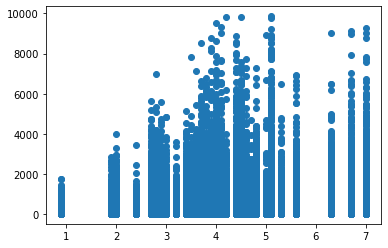

In [30]:
plt.scatter(trainfinal["op_area"],trainfinal['num_orders'])

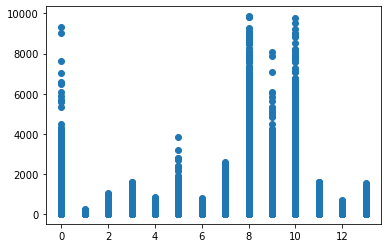

In [31]:
plt.scatter(trainfinal["category"],trainfinal['num_orders'])

In [32]:
trainfinal["category"]

0         0
1         0
2         0
3         0
4         0
         ..
456543    4
456544    4
456545    4
456546    4
456547    4
Name: category, Length: 456526, dtype: int64

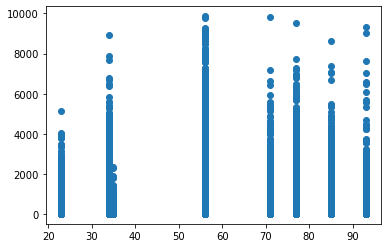

In [33]:
plt.scatter(trainfinal["region_code"],trainfinal['num_orders'])

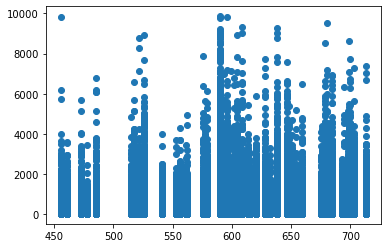

In [34]:
plt.scatter(trainfinal["city_code"],trainfinal['num_orders'])

# StandardScaler 

In [29]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X1=sc.fit_transform(X)
X1

array([[-0.35, -0.25, -0.3 , ..., -1.18, -0.03,  0.69],
       [-0.35, -0.25, -0.3 , ..., -1.18, -0.03,  0.69],
       [-0.35, -0.25, -0.3 , ..., -1.18, -0.03,  0.69],
       ...,
       [-0.35,  0.15, -0.3 , ..., -0.28,  1.16, -1.94],
       [-0.35,  0.15, -0.3 , ..., -0.28,  1.16, -1.94],
       [-0.35,  0.15, -0.3 , ..., -0.28,  1.16, -1.94]])

In [35]:
from joblib import dump
dump(sc,"scalar2.save")

['scalar2.save']

In [30]:
print(X1.shape)
print(Y.shape)

(456526, 8)
(456526,)


In [31]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y, test_size=0.2)

In [32]:
from sklearn.ensemble import RandomForestRegressor
reg2 = RandomForestRegressor(n_estimators = 200, random_state = 0)
reg2.fit(X_train1, y_train1)
y_pred3 = reg2.predict(X_test1)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test1.reshape(len(y_test1),1)),1))

[[138.15 176.  ]
 [727.81 825.  ]
 [412.16 216.  ]
 ...
 [120.75 204.  ]
 [ 50.04  41.  ]
 [329.07 378.  ]]


In [36]:
from sklearn.tree import DecisionTreeRegressor
reg3 = DecisionTreeRegressor(random_state = 2)
reg3.fit(X_train1, y_train1)
y_pred4 = reg3.predict(X_test1)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test1.reshape(len(y_test1),1)),1))

[[137.91 176.  ]
 [725.13 825.  ]
 [412.54 216.  ]
 ...
 [121.12 204.  ]
 [ 49.94  41.  ]
 [328.81 378.  ]]


In [33]:
from sklearn.metrics import r2_score
r2_score(y_test1, y_pred3)

0.7523176537166403

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test1, y_pred4)

0.7437947787789956

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator =reg2 , X = X_train1, y = y_train1, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [44]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator =reg3 , X = X_train1, y = y_train1, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 73.55 %
Standard Deviation: 0.68 %


In [34]:
import pickle
pickle.dump(reg2,open('decision2.pkl','wb'))